In [1]:
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

# load stage 3
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/light_chem/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
gather_df_3 = gather_dir_metrics(class_dirs[0], 1)     
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[3], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[4], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[5], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df_3.columns[i] and 'Median' not in gather_df_3.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df_3.columns[i]]
metric_names = list(gather_df_3.columns.values[col_indices])

gather_df_3 = gather_df_3[metric_names]
gather_df_3 = gather_df_3.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts_3 = get_mean_median_comps(gather_df_3, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_3 = get_agg_comp(mm_comp_dicts_3, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models_3 = get_overlap(agg_comp_dict_3, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median for 112 results
  r = func(a, **kwargs)
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\generic.py:1765: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\indexing.py:796: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


In [2]:
# load stage 2
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5
gather_df_2 = gather_dir_metrics(class_dirs[0], k)     
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[1], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[2], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[3], 20))
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[4], k))
gather_df_2 = gather_df_2[metric_names]
gather_df_2 = gather_df_2.dropna(axis=0)

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts_2 = get_mean_median_comps(gather_df_2, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_2 = get_agg_comp(mm_comp_dicts_2, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models_2 = get_overlap(agg_comp_dict_2, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\generic.py:1765: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\indexing.py:796: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Compare Model Orderings

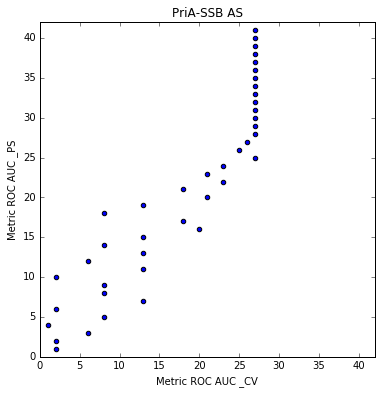

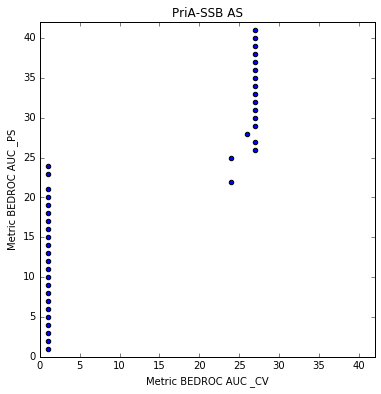

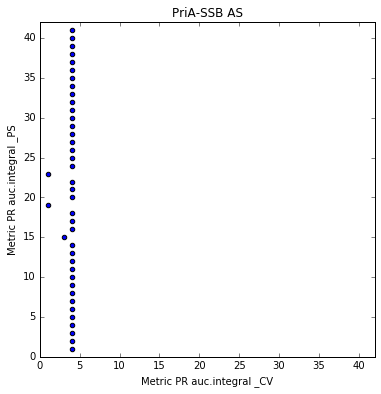

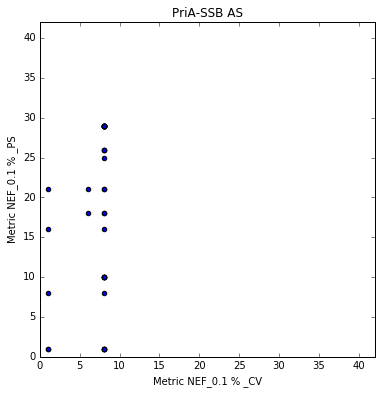

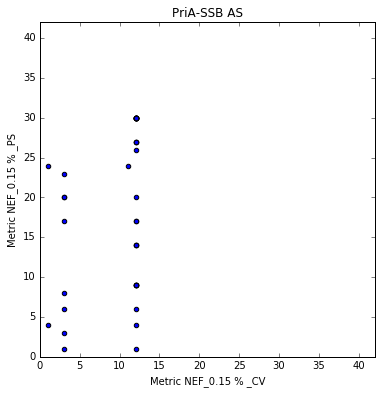

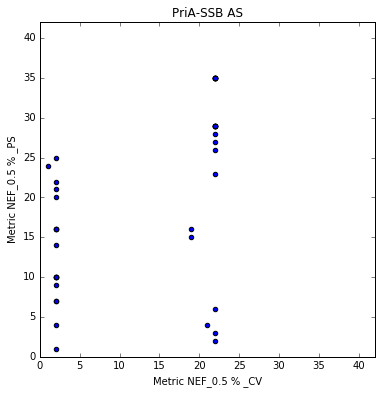

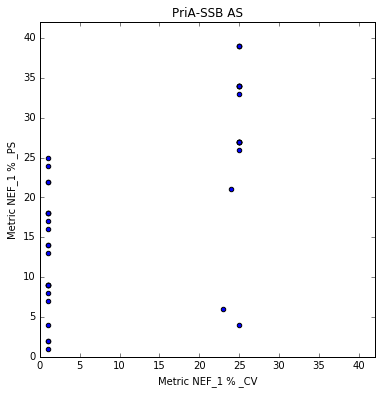

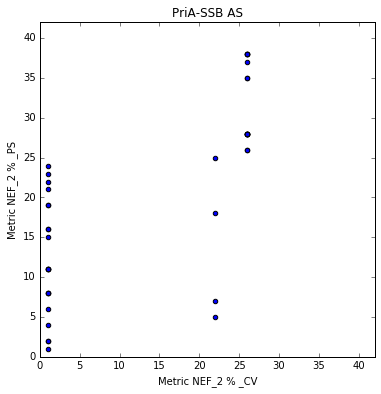

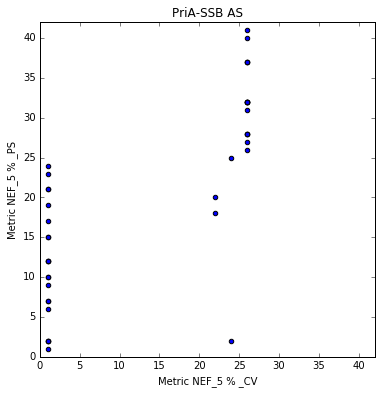

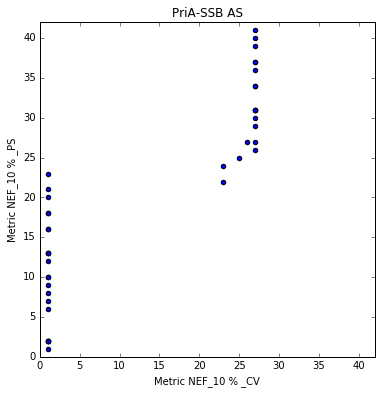

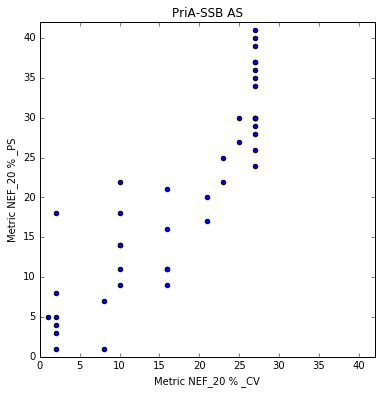

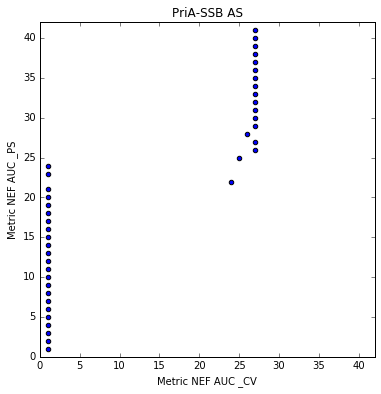

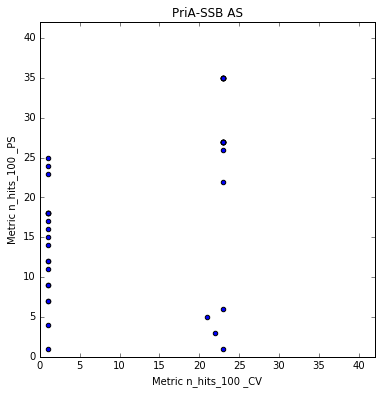

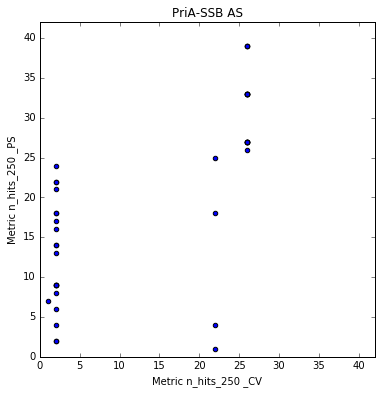

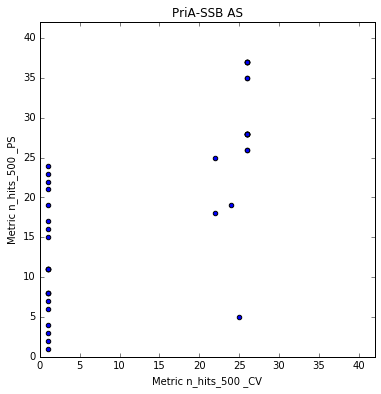

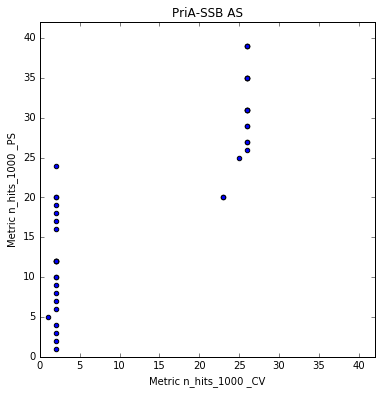

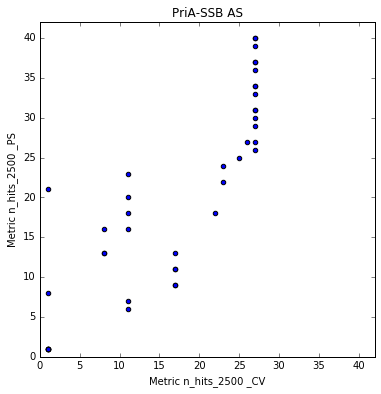

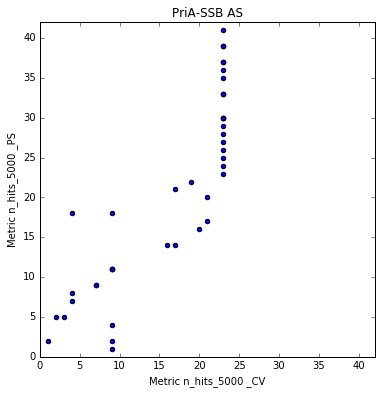

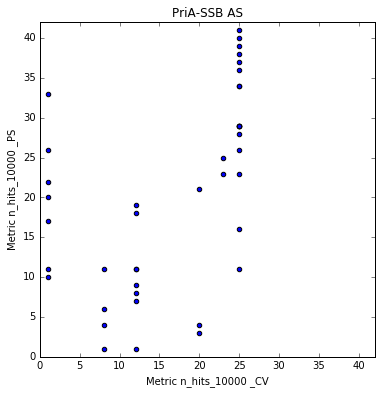

In [3]:
winscore_df_2 = get_model_winscores(agg_comp_dict_2, metric_names)
winscore_df_3 = get_model_winscores(agg_comp_dict_3, metric_names)
winscore_spearman_df = compare_cv_ps_model_ranking(winscore_df_2, winscore_df_3)
if not os.path.exists('./cv_ps_figures/cv_ps_model_ordering_comparison/'):
    os.makedirs('./cv_ps_figures/cv_ps_model_ordering_comparison/')
plot_comparison_cv_ps(winscore_df_2, winscore_df_3, './cv_ps_figures/cv_ps_model_ordering_comparison/')

In [4]:
winscore_spearman_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.940926,0.872127,0.045148,0.291889,0.362654,0.568209,0.749298,0.806009,0.830382,0.888918,0.906132,0.872375,0.634488,0.796391,0.831319,0.882421,0.882127,0.892873,0.59989


---
## Overlapping top 1 and top 5 models over all metrics

In [5]:
overlapping_models_2 

,overlap_perc
CBF_c,0.631579
SingleClassification_a,0.578947
SingleClassification_b,0.526316
MultiClassification_b,0.526316
CBF_e,0.473684
RandomForest_g,0.473684
SingleRegression_b,0.473684
MultiClassification_a,0.473684
RandomForest_d,0.473684
RandomForest_h,0.473684


In [6]:
overlapping_models_3

,overlap_perc
CBF_b,0.421053
CBF_c,0.315789
CBF_a,0.263158
CBF_f,0.210526
CBF_d,0.210526
RandomForest_g,0.105263
CBF_e,0.105263
RandomForest_h,0.052632
SingleClassification_b,0.052632


In [7]:
get_overlap(agg_comp_dict_2, N=5)

,overlap_perc
CBF_c,0.894737
MultiClassification_b,0.894737
CBF_b,0.789474
CBF_e,0.736842
RandomForest_d,0.736842
CBF_f,0.736842
RandomForest_g,0.736842
IRV_d,0.736842
SingleClassification_a,0.736842
SingleRegression_b,0.736842


In [8]:
get_overlap(agg_comp_dict_3, N=5)

,overlap_perc
CBF_c,1.000000
CBF_a,0.894737
CBF_f,0.894737
CBF_e,0.842105
CBF_b,0.736842
CBF_d,0.526316
RandomForest_g,0.105263
RandomForest_h,0.105263
SingleClassification_b,0.105263


---
## Spearman's Ranking Comparison

In [9]:
spearman_df_2, ordered_spearman_df_2 = get_spearman_r(agg_comp_dict_2, metric_names[:-7], metric_names[-7:])
spearman_df_3, ordered_spearman_df_3 = get_spearman_r(agg_comp_dict_3, metric_names[:-7], metric_names[-7:])
diff_df, ordered_diff_df, spearman_df = compare_spearman_r(spearman_df_2, spearman_df_3)
diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.245695,0.080408,0.074544,0.065150,0.064227,0.046850,0.286064
BEDROC AUC,0.146063,0.000996,0.015187,0.002549,0.087220,0.133861,0.235179
PR auc.integral,0.672310,0.709438,0.687808,0.806594,0.784278,0.842638,0.923105
NEF_0.1 %,0.457137,0.552198,0.494714,0.579482,0.552506,0.659071,0.542919
NEF_0.15 %,0.445449,0.489060,0.411374,0.437992,0.625776,0.694720,0.287915
NEF_0.5 %,0.052345,0.223509,0.126104,0.251872,0.377021,0.374143,0.132601
NEF_1 %,0.073798,0.099760,0.010318,0.127039,0.190747,0.197995,0.062258
NEF_2 %,0.166065,0.004587,0.035115,0.061397,0.103127,0.141599,0.202751
NEF_5 %,0.080108,0.004897,0.001286,0.083081,0.142221,0.145315,0.137968
NEF_10 %,0.158394,0.005128,0.023816,0.012958,0.078565,0.094974,0.266636


In [10]:
ordered_diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,BEDROC AUC,NEF_5 %,NEF AUC,NEF_20 %,ROC AUC,NEF_1 %
1,NEF_1 %,NEF AUC,NEF_1 %,BEDROC AUC,ROC AUC,NEF_20 %,NEF_0.5 %
2,NEF_5 %,NEF_2 %,NEF AUC,NEF_10 %,NEF_10 %,NEF_10 %,NEF_5 %
3,BEDROC AUC,NEF_5 %,BEDROC AUC,NEF_20 %,NEF AUC,BEDROC AUC,NEF_2 %
4,NEF AUC,NEF_10 %,NEF_10 %,NEF_2 %,BEDROC AUC,NEF AUC,BEDROC AUC
5,NEF_10 %,ROC AUC,NEF_2 %,ROC AUC,NEF_2 %,NEF_2 %,NEF AUC
6,NEF_2 %,NEF_20 %,ROC AUC,NEF_5 %,NEF_5 %,NEF_5 %,NEF_10 %
7,ROC AUC,NEF_1 %,NEF_20 %,NEF_1 %,NEF_1 %,NEF_1 %,ROC AUC
8,NEF_20 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.15 %
9,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.1 %,NEF_0.1 %,NEF_20 %


In [11]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.395797,0.335664,0.86014,0.776224,0.783217,0.811189,0.0


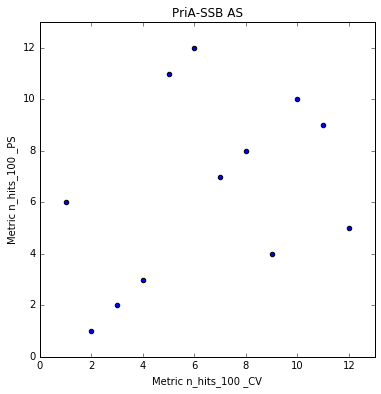

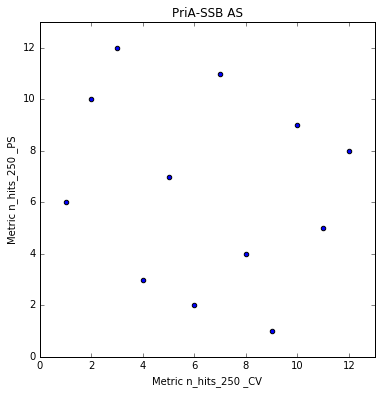

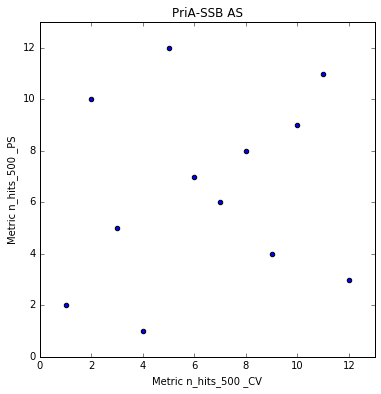

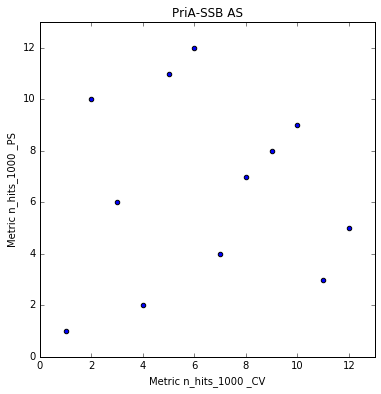

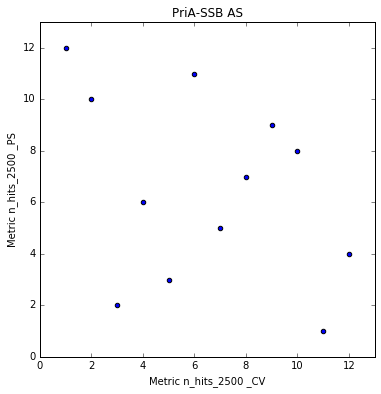

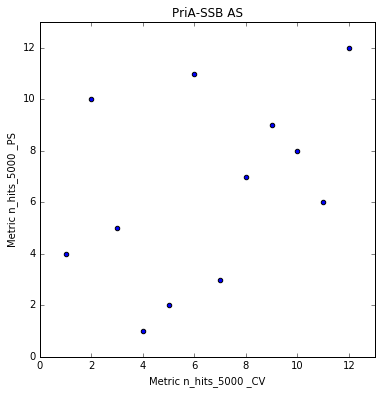

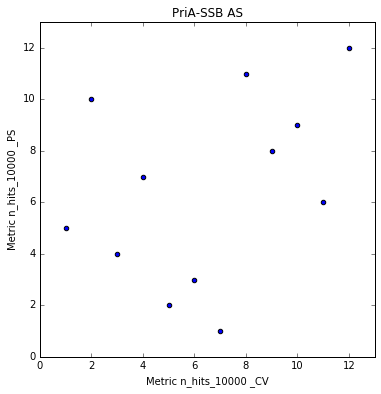

In [12]:
if not os.path.exists('./cv_ps_figures/cs_ps_scatter_plot_comparison/'):
    os.makedirs('./cv_ps_figures/cs_ps_scatter_plot_comparison/')
plot_comparison_cv_ps(ordered_spearman_df_2, ordered_spearman_df_3, './cv_ps_figures/cs_ps_scatter_plot_comparison/')